# Homework 6 - Linked List Labyrinth

<b>Due Date</b>: 11/2/2023 at 11:59pm<br>
<b>Points</b> - 1000 points<br>

><b>Qualitative Feedback</b>: The objective of this assignment is to give you practice with structs, linked lists, pointers, and memory allocation. You will demonstrate your ability to implement:
><ul>
>    <li>Advanced C Structs, including encapsulation</li>
>    <li>Command Line inputs</li>
>    <li>Recursion</li>
>    <li>Depth-First Search</li>
     <li>Developing Your Own Test Cases</li>
></ul>

## Setup Steps

<b>1.</b> Open Docker Desktop. Go to the cse20133-user Container you created. Press the Blue Triangle to start the Container.

<b>2.</b> Open VSCode, and on the left, select the blue button in the bottom left of VSCode. At the top, select the pull-down choice “Attach to running container” and select your CSE 20133 course container.

<b>3.</b> Go into your Git Folder:

> Recall that @USERNAME is the unique username you created when you created your GitHub account. You will see your user name in the VS Code Docker

    cd cse20133-user/cse20133-@USERNAME

Create the folder:

    mkdir homework06
    cd homework06

4 - You will run a setup script to obtain the skeleton files:

    wget https://raw.githubusercontent.com/mmorri22/cse20133/main/homeworks/homework6/setup.sh
    chmod a+rx setup.sh
    ./setup.sh
    
Once you run the setup script, this is what you should have:

    homework06.c  labyrinth.c  labyrinth.h  maze_generator.c  maze_generator.h

## Creating a Makefile with Multiple Libraries

The files are designed so they initially compile when you start your Makefile. Use the Makefile from the Lecture 24 In-Class code (specifically, the hanoi compilation) to create a Makefile that will compile the given files.

You will need to create three object files:
<ul>
    <li><code>homework06.o</code></li>
    <li><code>labyrinth.o</code></li>
    <li><code>maze_generator.o</code></li>
</ul>

When your assignment is completed, you will need to be able to run the command <code>make homework06</code>, and produce the output and compiler flags as shown below. You must also pass <code>valgrind</code> since we are performing dynamic memory allocation.

> Note: The ordering of the compilation does not matter, so if you compile maze_generator before labyrinth, it will not be an issue (specifically, you will not lose any points :) ) and the program will compile and run.

<code><font size="2" color="white" style="background-color:black;">> make homework06</font></code><br>
<code><font size="2" color="white" style="background-color:black;">gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c labyrinth.c</font></code><br>
<code><font size="2" color="white" style="background-color:black;">gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c maze_generator.c</font></code><br>
<code><font size="2" color="white" style="background-color:black;">gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c homework06.c</font></code><br>
<code><font size="2" color="white" style="background-color:black;">gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -o homework06 homework06.o labyrinth.o maze_generator.o -lm</font></code><br>
<code><font size="2" color="white" style="background-color:black;">valgrind --leak-check=full ./homework06 "Hello, World!"</font></code></font><br>

> Note: You will need to use two inputs, ./homework06 and a string.

Also remember that you need to pass <code>make clean</code>:

<code><font size="2" color="white" style="background-color:black;">> make clean</font></code><br>
<code><font size="2" color="white" style="background-color:black;">rm -rf *.o *.swp homework06</font></code><br>

## Using encapsulation to protect the maze

Let's take a look at labyrinth.h. The first struct you will want to review is <code>maze</code>. This is similar to the <code>sllist</code> struct we designed in Lecture 23. The objective here is to use <b>encapsulation</b> to provide security for our maze design.

    typedef struct maze{

        struct maze_cell* start_cell;

    }maze;
    
Go to <code>labyrinth.c</code> and go to the following function:

    maze* maze_constructor()
    
First, delete the code that is currently in the function, which is only there to ensure the code compiled when you designed your Makefile.

Dynamically allocate a <code>maze</code> pointer, set the <code>start_cell</code> to <code>NULL</code>, and then return that <code>maze</code> pointer.

In <code>main</code> in <code>homework06.c</code>, set a <code>maze</code> pointer equal to the result of <code>maze_constructor()</code>, and then make sure the last thing you do before <code>return EXIT_SUCCESS;</code> is free the <code>maz</code>e pointer.

At this stage, you should be able to compile and pass valgrind - even though the code 

## How we will make the maze!

So what is the maze you will make? The idea is that each <code>maze_cell</code> will represent the opportunity to go the <code>LEFT</code>, <code>MIDDLE</code>, and <code>RIGHT</code>. You will also have a pointer that links to the previous <code>maze_cell</code>, which allowed you to enter the room. Each room has a unique_id as well as an item (which we will discuss in more detail in a moment).

Here is the diagram representation

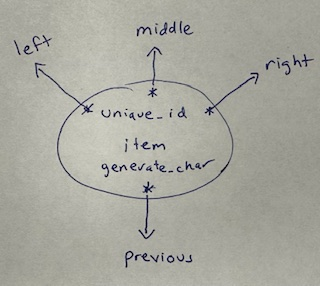

And here is the corresponding C struct.

    typedef struct maze_cell {

        // Pointers to the left, middle, and right
        // as well as the previous cell
        struct maze_cell* left;
        struct maze_cell* middle;
        struct maze_cell* right;
        struct maze_cell* previous;

        /* The unique ID for the cell */
        int unique_id;

        /* Establish the enumerated type value */
        enum item whats_here;

        /* The char used to generate the maze_cell */
        char generate_char;

    }maze_cell;
    
In the next few steps, we will build the fundamentals functions before developing the maze generation algorith,

## Building the Basics - Enumerated Type: item

An <b>enumerated type</b> is a collection of <b>compiler directives</b> that correspond to an integer value. Consider the 

    // NOTHING = 0
    // SPELLBOOK = 1
    // POTION = 2
    // WAND = 3
    // TREASURE = 4
    typedef enum item {
        NOTHING, SPELLBOOK, POTION, WAND, TREASURE
    }item;
    
Since it is an integer, you do not need to create a pointer or dynamically allocate memory.

What you will do is correlate a character with an item. To do this, go to <code>labyrinth.c</code> and find the following function:

    item which_item( char generate_char )
    
Recall that chars are 8-bit integers, so we can use % to get a specific result

    Get an integer that is the result of generate_char%6

If the result is 2, then you will have a maze_cell that contains a Book of Spells. In that case, return SPELLBOOK like shown below.

    if( result == 2 ){
        return SPELLBOOK;
    }
    
If result is 4, then we will generate a POTION. If that result is 5, return a WAND (for a magic wand). Otherwise, return NOTHING.

> <b>Hint:</b> Think of this as a cipher. if result is 2, then we set the item to SPELLBOOK, which is 1

## Building the Basics - Constructing a maze_cell

Remaining the <code>labyrinth.c</code>, we will now write a program that constructs a <code>maze_cell</code>. To do this, go to <code>labyrinth.c</code> and find the following function

    maze_cell* mc_constructor(maze_cell* previous, int curr_id, char generate_char)

You will do the following:
<ul>
    <li>Dynamically create a maze_cell</li>
    <li>Set the maze_cell's left, middle, and right pointers to NULL</li>
    <li>Set the maze_cell's previous pointer to the previous we pass to the function</li>
    <li>Set the curr_id and generate_char values in the maze_cell to the corresponding values in the maze_cell struct</li>
    <li>Use the generate_char to generate an item and set that item to the corresponding value in the maze_cell struct</li>
    <li>Return the maze_cell pointer</li>
</ul>

## Building the Basics - Destructing the maze_cells

To ensure you pass valgrind, you will recursively destruct the maze_cells. To do this, go to <code>maze_generator.c</code> and go to the following function:

    void delete_maze(maze_cell* curr_cell)
    
We will take an approach similar to how we deleted the singly linked list. Recall that this was the destructor, where you recursively deleted all the nodes.

    void destructor( sll_node* curr_ptr ){

        // Dr. Morrison's Golden Rule of Pointers
        if( curr_ptr != NULL ){

            // Recursively call destructor on the next node
            destructor( curr_ptr->next_node );
            // Free the current pointer
            free(curr_ptr);
        }

    }

The difference is that you need to go to the left, to the middle, and then to the right instead of just to the next node. <i>Then</i> you free the current cell.

## Building the Basics - Printing a Cell

Once we implement the algorithm in the last step, you will need to print the generated maze. But first we should set up how to print the maze cells. To do this, go to <code>maze_generator.c</code> and go to the following function:

    void print_maze( maze_cell* curr_cell )
    
First, follow Dr. Morrison's Golden Rule of pointers, and check if the curr_cell is NULL, and just return if it is.

Next, print the ID and the character used to generate the result. For example, if the input is <code>"Hello, World!"</code>, then the initial cell will be 'H', so a valid print out will look like this:

    ID: 1 generated using H
    
On the next line, you should print the item. Use the enumerated type compiler directive to print the output. You need to print what the type is, but you can have some fun and add another message. For example:

    if( curr_cell->whats_here == NOTHING ){
        fprintf(stdout, "Nothing's here! Let's keep looking, Scooby Doo...\n");
    }
    
Repeat for all the other options in the <code>item</code> enumerated type. Here are examples for SPELLBOOK, WAND, POTION, and TREASURE:

    We found a Spellbook! Be careful what you chant...
    
    We found a Potion! Check to see what the potion before you drink it.
    
    We found a Wand! It's pronounced levio-SAH.
    
    We found the treasure! WE'RE RICH!
    
Next, you will need to perform Depth-First Search to search each direction. Repeat for middle and right.

    if( curr_cell->left != NULL ){
        fprintf( stdout, "There is a path to the left in cell %d!\n", curr_id);
        print_maze( curr_cell->left );
    }
    
For example, the algorithm we will design will go to the middle first, and print the following few lines:

    ID: 1 generated using H
    Nothing's here! let's keep looking
    There is a path in the middle in cell 1!
    ID: 2 generated using e
    We found a Wand! It's pronounced levio-SAH.
    There is a path to the left in cell 2!

The last print statement in the print_maze is to indicate there are no more valid paths forward, and that you are going backwards. Here is an example

    There are no more valid paths forward in 8! Going backwards.

## Now that the basics are built - Implementing the Algorithm!

Now that we have all the foundational functions completed, we can implement the maze generation algorithm. 

Let's discuss the goal of the algorithm first. Our objective is to develop a unique maze based on a user input key. We can tell the compiler than a command line argument is one string by surronding it like 

    valgrind --leak-check=full ./homework06 "Hello, World!"
    
And here is the goal maze we will build towards:

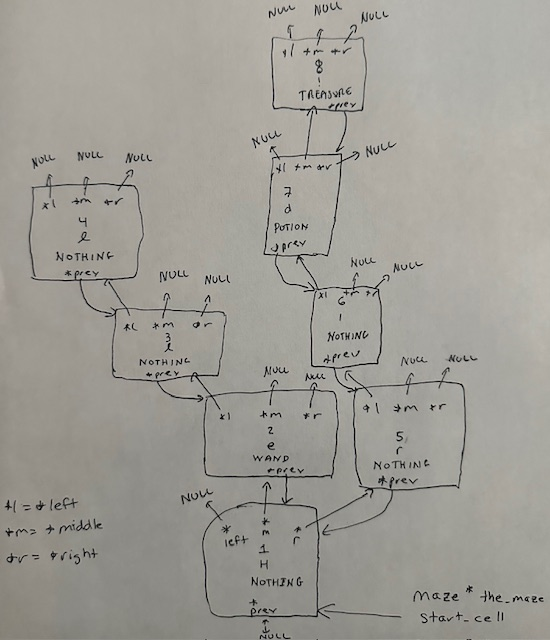
    
    
We will walk though the process of implementing the recursive algorithm. To do this, go to <code>maze_generator.c</code> and go to the following function:

    void generate_cell(maze_cell* curr_cell, const char* key_string, int* curr_id, int* char_loc)
    
Since you are generating a new cell, the first thing you should do is increment the value of char_loc by one, since this will move you to the next character in the string.

> Our algorithm will have two base cases. 
<ul>
    <li>In our algorithm, the TREASURE will be at the location of the last character. If the character in <code>key_string[*char_loc]</code> is equal to <code>'\0'</code>, then set the item in the current cell to TREASURE and then return.</li>
    <li>For the other case, we will start at the beginning of the maze and re-traverse if we encounter a <code>' '</code> character. If that character is equal to a space, simply return;</li>
</ul>

> There will be four recursive cases for <b>GO_BACK</b>, <b>LEFT</b>, <b>MIDDLE</b>, and <b>RIGHT</b>. I'll describe how <b>GO_BACK</b> and <b>LEFT</b> will work, and once you get that working, you will replicate the code for <b>MIDDLE</b> and <b>RIGHT</b>.

Take a look at the compiler directives in <code>maze_generator.h</code>. They are:

    #define LEFT 0
    #define MIDDLE 1
    #define RIGHT 2
    #define GO_BACK 3
    
Back to the generate_cell function after the two bases cases:

    First, get a value which is the result of performing a mod of the current character by 4.
    
The result will be 0, 1, 2, or 3, which correlates to our cases

### GO_BACK

If the value is <code>GO_BACK</code>, then we are going to go one step backwards in the maze. We must consider two cases:
<ol>
    <li>If the <code>curr_cell->previous</code> is NULL, this means we are at the beginning of the maze since there is no previous cell, so just call return. (This will prevent segmentation faults)</li>
    <li>Otherwise, recursively call the <code>generate_cell</code> function with <code>curr_cell->previous</code> as the first input. This means we go <b>one step backwards</b> in the maze.</li>
</ol>

### LEFT

For any of the forward directions, we use the value from the modded result to go LEFT, MIDDLE, or RIGHT. There are two potential cases:
<ol>
    <li>The path forward does not have a <code>maze_cell</code>, so we need to increment the <code>unique_id</code>, and then construct a <code>maze_cell</code> using the <code>mc_constructor</code>.</li>
    <ul>
        <li>For help, you start the construction for left by performing: <code>curr_cell->left = mc_constructor( curr_cell, ... </code>, since the <code>curr_cell</code> will be the previous node for <code>curr_cell->left</code><br></li>
    </ul>
    <li>The path forward already has a <code>maze_cell</code>, so we do not need to create a cell. We just use the character to know which way to traverse</li>
</ol>

At that point, you are guaranteed a path forward, so recursively call the <code>generate_cell</code> function on <code>curr_cell->left</code>

    generate_cell( curr_cell->left, ....
    
> <b>Hint:</b> The "guaranteed a path forward" statement means that you should not have an else statement around the <code>generate_cell</code> since traversing down the path should happen every time. (Hence, "guaranteed")
    
### MIDDLE and RIGHT

Do the same thing for MIDDLE and RIGHT as you have done for LEFT. For simplicity, do not use else if statements since this is recursive.

## generate_maze - Review and Potential Help

I have provided the <code>generate_maze</code> for you in part to provide some guidance on how to call pointers in structs, as well as  reminders on passing information by reference. Here is the function and some inline comments for you to see what it is that I do in my program design

    void generate_maze( maze* the_maze, const char* key_string ){

> The purpose of <code>generate_maze</code> is to create the first cell, and then recursively call the <code>generate_cell</code>. This will be generated with the first character, so location <code>loc</code> will be at 0, and the <code>unique_id</code> will be 1.

        int curr_id = 1;
        int loc = 0;

> I create a <code>maze_cell</code> using the <code>mc_constructor</code>. NULL is because the first input is the <i>previous</i> node. Since this is the starting cell, there should not be a previous node, hence NULL. The <code>curr_id</code> will be passed as the second argument. Finally, the third argument will be <code>key_string[loc]</code> since we need that character in the construction of the cell.<br>
>
> Notice how I set the result to <code>the_maze->start_cell</code>. We do not need to have two line where I create a temp result. Since we set the constructor as NULL, we can just <i>update the pointer</i>

        /* Create the initial cell in the Maze */
        the_maze->start_cell = mc_constructor( NULL, curr_id, key_string[loc] );

> This is a unique aspect of the algorithm. In the event we GO_BACK, the string may not be completed. So we keep looping until we get to the end of the string. Then we call generate_cell with <code>the_maze->start_cell</code>. Note how <code>curr_in</code> and <code>loc</code> are passed by reference. We will be able to update them in in this function call even with all the recursion!

        while( key_string[loc] != '\0' ){

            generate_cell( the_maze->start_cell, key_string, &curr_id, &loc );
        }

    }

## Implementing in main

Now that we have implemented everything else in <code>labyrinth.c</code> and <code>maze_generator.c</code>, we can implement the

<ol>
    <li>Construct a maze (you have likely already done this)</li>
    <li>Pass the maze you constructed and argv[1] to <b>generate the maze</b></li>
    <li>Pass the maze's start_cell to <b>print the maze</b></li>
    <li>Pass the maze's start_cell to <b>delete the maze</b></li>
    <li>Free the maze (you have likely already done this)</li>
</ol>

## Example Output 1

    > make homework06
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c homework06.c
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c maze_generator.c
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -c labyrinth.c
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -o homework06 homework06.o maze_generator.o labyrinth.o -lm
    > valgrind --leak-check=full ./homework06 "Hello, World!"
    ==133445== Memcheck, a memory error detector
    ==133445== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
    ==133445== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
    ==133445== Command: ./homework06 Hello,\ World!
    ==133445== 
    ID: 1 generated using H
    Nothing's here! let's keep looking
    There is a path in the middle in cell 1!
    ID: 2 generated using e
    We found a Wand! It's pronounced levio-SAH.
    There is a path to the left in cell 2!
    ID: 3 generated using l
    Nothing's here! let's keep looking
    There is a path to the left in cell 3!
    ID: 4 generated using l
    Nothing's here! let's keep looking
    There are no more valid paths forward in 4! Going backwards.
    There are no more valid paths forward in 3! Going backwards.
    There are no more valid paths forward in 2! Going backwards.
    There is a path to the right in cell 1!
    ID: 5 generated using r
    Nothing's here! let's keep looking
    There is a path to the left in cell 5!
    ID: 6 generated using l
    Nothing's here! let's keep looking
    There is a path to the left in cell 6!
    ID: 7 generated using d
    We found a Potion! Check to see what the potion before you drink it.
    There is a path in the middle in cell 7!
    ID: 8 generated using !
    We found the treasure! WE'RE RICH!
    There are no more valid paths forward in 8! Going backwards.
    There are no more valid paths forward in 7! Going backwards.
    There are no more valid paths forward in 6! Going backwards.
    There are no more valid paths forward in 5! Going backwards.
    There are no more valid paths forward in 1! Going backwards.
    ==133445== 
    ==133445== HEAP SUMMARY:
    ==133445==     in use at exit: 0 bytes in 0 blocks
    ==133445==   total heap usage: 10 allocs, 10 frees, 1,416 bytes allocated
    ==133445== 
    ==133445== All heap blocks were freed -- no leaks are possible
    ==133445== 
    ==133445== For lists of detected and suppressed errors, rerun with: -s
    ==133445== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)

## Example Output 2

    > valgrind --leak-check=full ./homework06 "Eirinn the Pupfessor"
    ==134057== Memcheck, a memory error detector
    ==134057== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
    ==134057== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
    ==134057== Command: ./homework06 Eirinn\ the\ Pupfessor
    ==134057== 
    ID: 1 generated using E
    Nothing's here! let's keep looking
    There is a path to the left in cell 1!
    ID: 7 generated using t
    We found a Spellbook! Be careful what you chant...
    There is a path to the left in cell 7!
    ID: 8 generated using h
    We found a Spellbook! Be careful what you chant...
    There is a path in the middle in cell 8!
    ID: 9 generated using e
    We found a Wand! It's pronounced levio-SAH.
    There are no more valid paths forward in 9! Going backwards.
    There are no more valid paths forward in 8! Going backwards.
    There is a path in the middle in cell 7!
    ID: 10 generated using u
    Nothing's here! let's keep looking
    There is a path to the left in cell 10!
    ID: 11 generated using p
    We found a Potion! Check to see what the potion before you drink it.
    There is a path to the right in cell 11!
    ID: 12 generated using f
    Nothing's here! let's keep looking
    There is a path in the middle in cell 12!
    ID: 13 generated using e
    We found a Wand! It's pronounced levio-SAH.
    There are no more valid paths forward in 13! Going backwards.
    There are no more valid paths forward in 12! Going backwards.
    There are no more valid paths forward in 11! Going backwards.
    There is a path to the right in cell 10!
    ID: 14 generated using r
    We found the treasure! WE'RE RICH!
    There are no more valid paths forward in 14! Going backwards.
    There are no more valid paths forward in 10! Going backwards.
    There are no more valid paths forward in 7! Going backwards.
    There is a path in the middle in cell 1!
    ID: 2 generated using i
    Nothing's here! let's keep looking
    There is a path to the right in cell 2!
    ID: 3 generated using r
    Nothing's here! let's keep looking
    There is a path in the middle in cell 3!
    ID: 4 generated using i
    Nothing's here! let's keep looking
    There is a path to the right in cell 4!
    ID: 5 generated using n
    We found a Spellbook! Be careful what you chant...
    There is a path to the right in cell 5!
    ID: 6 generated using n
    We found a Spellbook! Be careful what you chant...
    There are no more valid paths forward in 6! Going backwards.
    There are no more valid paths forward in 5! Going backwards.
    There are no more valid paths forward in 4! Going backwards.
    There are no more valid paths forward in 3! Going backwards.
    There are no more valid paths forward in 2! Going backwards.
    There are no more valid paths forward in 1! Going backwards.
    ==134057== 
    ==134057== HEAP SUMMARY:
    ==134057==     in use at exit: 0 bytes in 0 blocks
    ==134057==   total heap usage: 16 allocs, 16 frees, 1,704 bytes allocated
    ==134057== 
    ==134057== All heap blocks were freed -- no leaks are possible
    ==134057== 
    ==134057== For lists of detected and suppressed errors, rerun with: -s
    ==134057== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)

## Submitting Your Assignment: Committing and Pushing Through VS Code

By the due date, you must <code>commit</code> and <code>push</code> directly from the VS Code.

First, you <i>must</i> run <code>make clean</code> to ensure you do not push any executable or object files. You will receive a deduction of 50 points if you include executables or object files in your GitHub.

    make clean

From the VS Code Terminal:

    cd ..
    
At this point, you should be in the <code>cse20133-@USERNAME</code> folder

    git add --all
    git commit -m "Homework 6 Submission"
    git push -u origin main